<a href="https://colab.research.google.com/github/zaydkhamker/Portfolio-Projects/blob/main/California_Housing_%26_Titanic_Survival_Machine_Learning_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CHANGED DOCUMENT NAME TO "housing_coursework"
import numpy as np
import pandas as pd
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()

Saving housing_coursework.csv to housing_coursework.csv


In [ ]:
housingData_csv = pd.read_csv('housing_coursework.csv')
df = pd.DataFrame(data= housingData_csv)
display(df)

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,INLAND
996,997,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
997,998,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
998,999,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND


In [ ]:
features=['No.',	'longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value',	'ocean_proximity']
X_raw = housingData_csv[features]
y_raw = housingData_csv['median_house_value']
print(X_raw.shape)

(1000, 11)


In [ ]:
X_raw = X_raw.drop(columns=['No.']) # Remove the studentID column using '.drop'
display(X_raw.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [ ]:
display(X_raw.select_dtypes(include=np.number).head(10)) # display numeric colmuns
display(X_raw.select_dtypes(exclude=np.number).head(10)) # display non-numeric colmuns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800
5,-122.19,37.76,26,1293,297.0,984,303,1.9479,85800
6,-122.17,37.74,43,818,193.0,494,179,2.4776,101600
7,-122.18,37.75,46,941,218.0,621,195,1.3250,87100
8,-122.16,37.75,38,2457,624.0,1516,482,1.5625,91700
9,-122.14,37.75,33,1334,200.0,579,202,6.8323,255900


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [ ]:
display(X_raw.select_dtypes(include=np.number).describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.00000,1000.000000,991.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,-119.508740,35.604810,27.62500,2736.217000,557.273461,1471.59000,515.909000,3.955882,207767.443000
std,1.960951,2.139722,12.27253,2179.854484,426.100791,1123.21073,384.781423,1.940355,113675.832278
min,-124.190000,32.560000,2.00000,19.000000,11.000000,34.00000,9.000000,0.536000,14999.000000
25%,-121.520000,33.910000,17.75000,1484.500000,301.500000,805.75000,287.750000,2.625000,119900.000000
50%,-118.480000,34.255000,27.50000,2214.000000,449.000000,1199.50000,426.500000,3.692600,184350.000000
75%,-118.030000,37.700000,36.00000,3260.000000,668.500000,1803.75000,626.000000,4.856800,261950.000000
max,-115.410000,41.780000,52.00000,27700.000000,4386.000000,15037.00000,4072.000000,15.000100,500001.000000


mean = 
[0.509025   0.32943194 0.09836363 0.12505624 0.09565179 0.12494954
 0.2384926 ], 
var = 
[0.06042605 0.0536299  0.0061394  0.0096785  0.00561644 0.00907205
 0.01952522]
mean = 
[ 2.05391260e-16  2.97539771e-16 -1.24344979e-16 -2.24265051e-16
  8.88178420e-17  1.08801856e-16 -4.44089210e-17], 
var = 
[1. 1. 1. 1. 1. 1. 1.]
Linear Regression - MSE: 5264290277.6830 R2 score: 0.5427
K-Nearest Neighbors - MSE: 6400764402.5070 R2 score: 0.4440
Random Forest - MSE: 5121198892.3439 R2 score: 0.5551


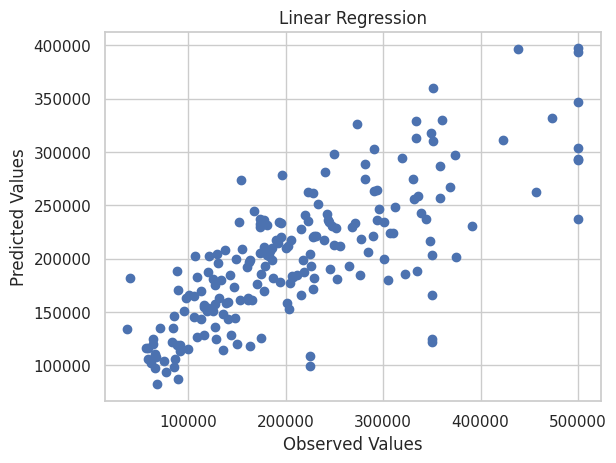

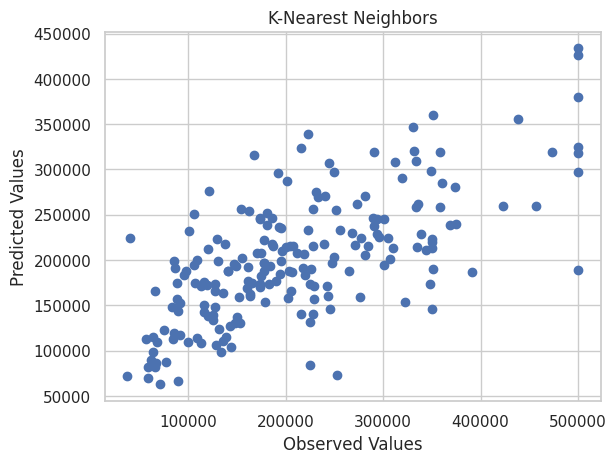

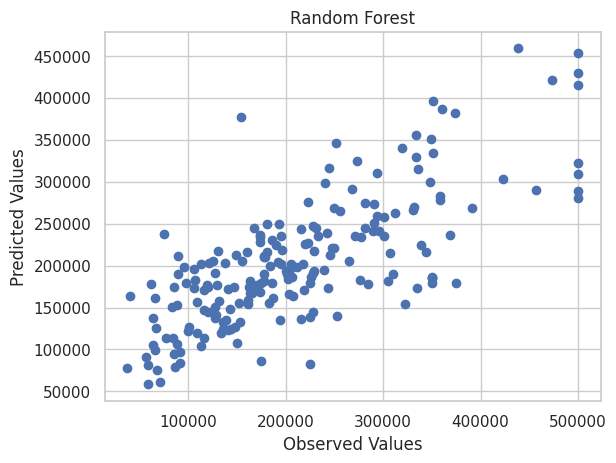

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Select features
features = ['housing_median_age', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X_raw = X_raw[features]

# Preprocessing
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

X_train_num = X_train_raw.select_dtypes(include=np.number)

numeric_imputer = SimpleImputer(strategy='mean') #Imputer Objects

numeric_imputer.fit(X_train_num)#Imputers on training data

# Training
X_train_num_imp = numeric_imputer.transform(X_train_num)

#Split Test Data
X_test_num = X_test_raw.select_dtypes(include=np.number)
X_test_num_imp = numeric_imputer.transform(X_test_num)

# Scaler Object
scaler = MinMaxScaler()
#Fit on training data
scaler.fit(X_train_num_imp)
# Transform the training and test data
X_train_num_sca = scaler.transform(X_train_num_imp)
X_test_num_sca = scaler.transform(X_test_num_imp)

X_train = X_train_num_sca
X_test = X_test_num_sca

scaler = StandardScaler()
scaler.fit(X_train) # calculate the mean and variance for each feature and store to attributes
print(f'mean = \n{scaler.mean_}, \nvar = \n{scaler.var_}') # print the calculated mean and variance for each attribute
X_train_stded = scaler.transform(X_train) # standardize X_train
print(f'mean = \n{np.mean(X_train_stded, axis=0)}, \nvar = \n{np.var(X_train_stded, axis=0)}') # verify that X_train_stded has mean 0 (mean isn't quite 0 due to numerical error, but is a miniscule value) and variance 1.

# Define the hyperparameter grid for Linear Regression
lr_param_grid = {}

# Define the hyperparameter grid for K-Nearest Neighbors
knn_param_grid = {'n_neighbors': [3, 5, 7]}

# Define the hyperparameter grid for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Grid search for Linear Regression
lr_grid_search = GridSearchCV(LinearRegression(), param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Grid search for K-Nearest Neighbors
knn_grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_lr_params = lr_grid_search.best_params_
best_knn_params = knn_grid_search.best_params_
best_rf_params = rf_grid_search.best_params_

# Train the models using the best hyperparameters
best_lr = LinearRegression(**best_lr_params)
best_lr.fit(X_train, y_train)

best_knn = KNeighborsRegressor(**best_knn_params)
best_knn.fit(X_train, y_train)

best_rf = RandomForestRegressor(**best_rf_params)
best_rf.fit(X_train, y_train)

# Make predictions using the best models
y_pred_lr = best_lr.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Calculate the mean squared error and R2 score for each model
mse_lr = sklearn.metrics.mean_squared_error(y_test, y_pred_lr)
r2_lr = sklearn.metrics.r2_score(y_test, y_pred_lr)

mse_knn = sklearn.metrics.mean_squared_error(y_test, y_pred_knn)
r2_knn = sklearn.metrics.r2_score(y_test, y_pred_knn)

mse_rf = sklearn.metrics.mean_squared_error(y_test, y_pred_rf)
r2_rf = sklearn.metrics.r2_score(y_test, y_pred_rf)

# Print the results
print('Linear Regression - MSE: {:.4f} R2 score: {:.4f}'.format(mse_lr, r2_lr))
print('K-Nearest Neighbors - MSE: {:.4f} R2 score: {:.4f}'.format(mse_knn, r2_knn))
print('Random Forest - MSE: {:.4f} R2 score: {:.4f}'.format(mse_rf, r2_rf))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

# Scatter plot for K-Nearest Neighbors
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors')
plt.show()

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files
uploaded = files.upload()

Saving Titanic_coursework_entire_dataset_23-24.csv to Titanic_coursework_entire_dataset_23-24.csv


In [ ]:
titanic_data = pd.read_csv('Titanic_coursework_entire_dataset_23-24.csv')
df = pd.DataFrame(data= titanic_data)
display(df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [ ]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
# number of rows and Columns
titanic_data.shape

(890, 11)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Pclass         2
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survival       0
dtype: int64

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,888.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,445.500000,2.306306,29.699118,0.523596,0.382022,32.231521,0.384270
std,257.065167,0.836515,13.009326,1.103224,0.806409,49.714678,0.486696
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,445.500000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# finding the number of people survived and not survived
titanic_data['Survival'].value_counts()

0    548
1    342
Name: Survival, dtype: int64

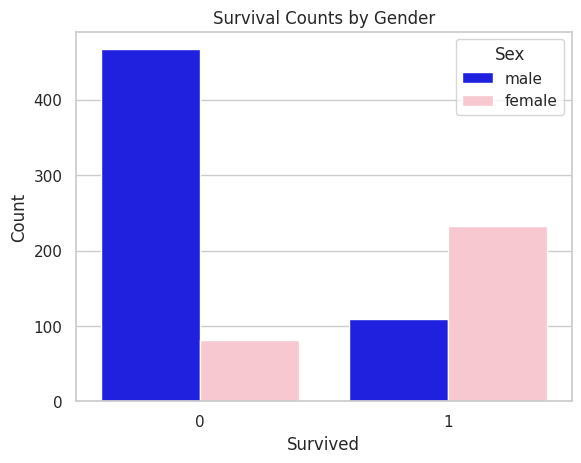

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")

# Create a count plot for survival with hue as 'Sex'
sns.countplot(x='Survival', hue='Sex', data=titanic_data, palette={'male': 'blue', 'female': 'pink'})

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts by Gender')

# Show the plot
plt.show()


In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket', 'Survival'],axis=1)
y = titanic_data['Survival']

print (X)
print (y)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0       3.0    male  22.000000      1      0   7.2500        S
1       1.0  female  38.000000      1      0  71.2833        C
2       3.0  female  26.000000      0      0   7.9250        S
3       1.0  female  35.000000      1      0  53.1000        S
4       3.0    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
885     2.0    male  27.000000      0      0  13.0000        S
886     1.0  female  19.000000      0      0  30.0000        S
887     3.0  female  29.699118      1      2  23.4500        S
888     1.0    male  26.000000      0      0  30.0000        C
889     3.0    male  32.000000      0      0   7.7500        Q

[890 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    1
887    0
888    1
889    0
Name: Survival, Length: 890, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Pre-processing
numeric_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

# Define classifiers with parameter grids for Random Search
classifiers = {
    "Logistic Regression": (LogisticRegression(), {'classifier__C': np.logspace(-3, 3, 100)}),
    "Support Vector Machine": (SVC(), {'classifier__C': np.logspace(-3, 3, 100), 'classifier__gamma': np.logspace(-3, 3, 100)}),
    "Decision Tree": (DecisionTreeClassifier(), {'classifier__max_depth': [None] + list(np.arange(1, 50))})
}

# Training, Hyperparameter Tuning, and Evaluation
results = {}
for name, (classifier, param_grid) in classifiers.items():
    # Define the pipeline
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', classifier)])

    # Perform Random Search
    random_search = RandomizedSearchCV(clf_pipeline, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Best parameters and best score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print(f"Best parameters for {name} using Random Search:")
    print(best_params)
    print(f"Best accuracy for {name} using Random Search:")
    print(best_score)

    # Predict on the testing set
    y_pred = random_search.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()





Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Logistic Regression using Random Search:
{'classifier__C': 0.04328761281083059}
Best accuracy for Logistic Regression using Random Search:
0.8032570806100218
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Support Vector Machine using Random Search:
{'classifier__gamma': 0.11497569953977356, 'classifier__C': 2.848035868435802}
Best accuracy for Support Vector Machine using Random Search:
0.8166013071895424
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree using Random Search:
{'classifier__max_depth': 3}
Best accuracy for Decision Tree using Random Search:
0.800326797385621
Logistic Regression Metrics:
Accuracy: 0.8271028037383178
Precision: 0.8072289156626506
Recall: 0.7613636363636364
F1 Score: 0.783625730994152

Support Vector Machine Metrics:
Accuracy: 0.8504672897196262
Precision: 0.9
Recall: 0.7159090909090909
F1 Score: 0.7974683544303798

Decision Tree Metrics:
Accuracy: 0.8271028037383178
Precision: 0.8311688311688312
Recall: 0.7272727272727273
F1 Score: 0.7757575757575759



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Logistic Regression using Random Search:
{'classifier__C': 0.02848035868435802}
Best accuracy for Logistic Regression using Random Search:
0.7907022554909878


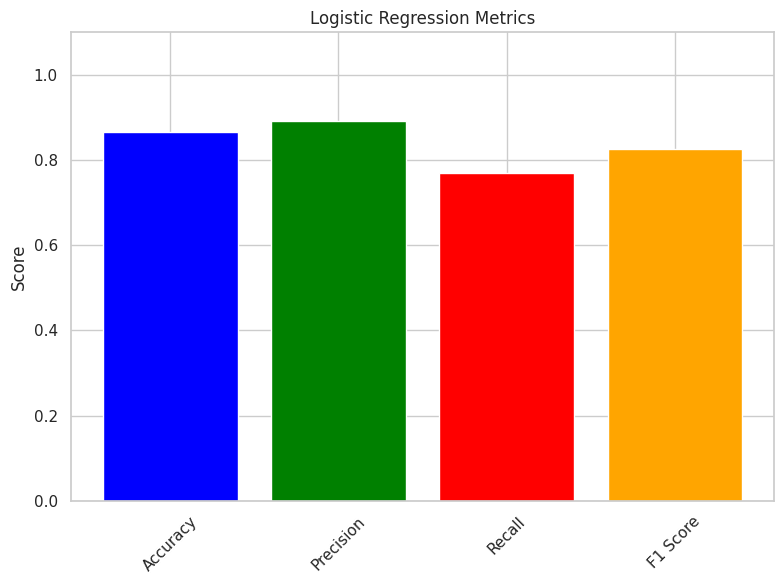

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Support Vector Machine using Random Search:
{'classifier__gamma': 0.037649358067924674, 'classifier__C': 93.26033468832199}
Best accuracy for Support Vector Machine using Random Search:
0.8145966709346991


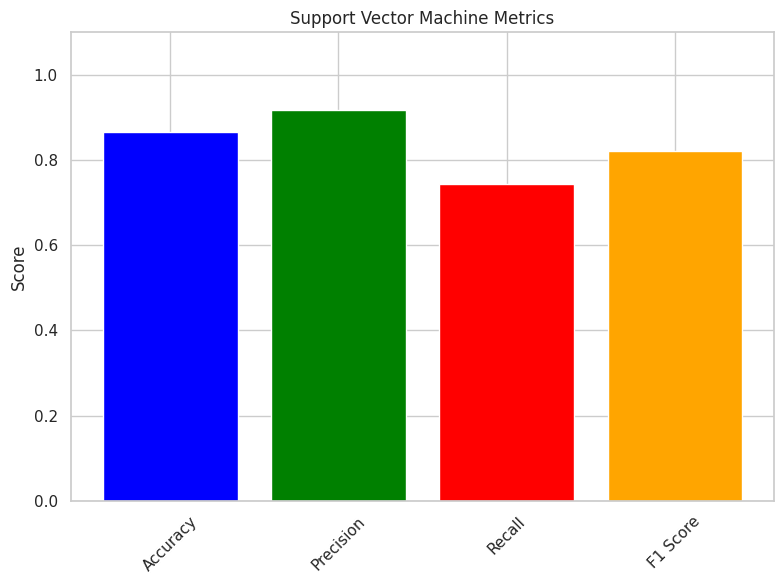

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree using Random Search:
{'classifier__max_depth': 4}
Best accuracy for Decision Tree using Random Search:
0.794927607603664


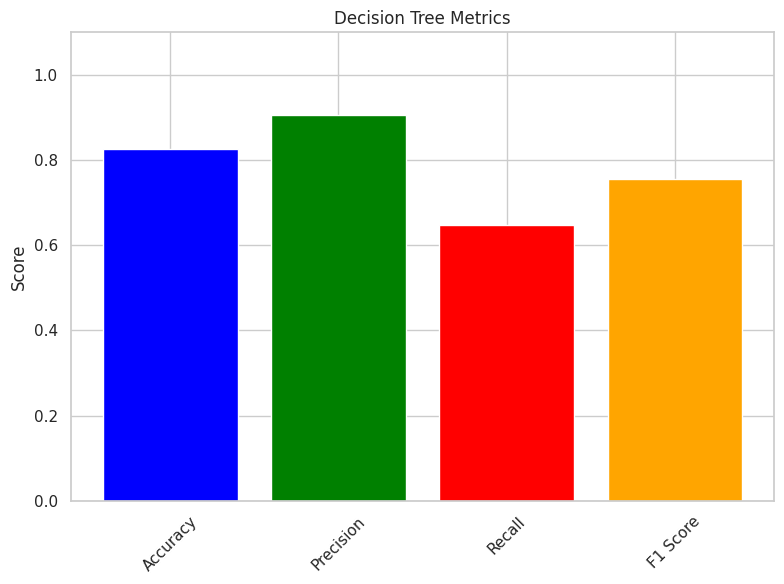

Logistic Regression Metrics:
Accuracy: 0.8651685393258427
Precision: 0.890625
Recall: 0.7702702702702703
F1 Score: 0.8260869565217391

Support Vector Machine Metrics:
Accuracy: 0.8651685393258427
Precision: 0.9166666666666666
Recall: 0.7432432432432432
F1 Score: 0.8208955223880596

Decision Tree Metrics:
Accuracy: 0.8258426966292135
Precision: 0.9056603773584906
Recall: 0.6486486486486487
F1 Score: 0.7559055118110237



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Pre-processing
numeric_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers with parameter grids for Random Search
classifiers = {
    "Logistic Regression": (LogisticRegression(), {'classifier__C': np.logspace(-3, 3, 100)}),
    "Support Vector Machine": (SVC(), {'classifier__C': np.logspace(-3, 3, 100), 'classifier__gamma': np.logspace(-3, 3, 100)}),
    "Decision Tree": (DecisionTreeClassifier(), {'classifier__max_depth': [None] + list(np.arange(1, 50))})
}

# Training, Hyperparameter Tuning, and Evaluation
results = {}
for name, (classifier, param_grid) in classifiers.items():
    # Define the pipeline
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', classifier)])

    # Perform Random Search
    random_search = RandomizedSearchCV(clf_pipeline, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Best parameters and best score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print(f"Best parameters for {name} using Random Search:")
    print(best_params)
    print(f"Best accuracy for {name} using Random Search:")
    print(best_score)

    # Predict on the testing set
    y_pred = random_search.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [accuracy, precision, recall, f1]
    ax.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'orange'])
    ax.set_title(f'{name} Metrics')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print results
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()
